#**Home work** ***FA24-BBD-101 MUHAMMAD SALMAN SALEEM***

##Data manipulation with Pandas

###**Task 1:** Handling Missing Values
###**Activity  Goal:** Practice different techniques for dealing with missing data.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [197]:
import pandas as pd
import numpy as np

In [198]:
df = pd.read_csv('/content/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [200]:
df.replace("?",np.nan, inplace=True)

***Identify columns with more than 20% missing values and drop them.:***


In [201]:
per = df.isnull().sum()/df.shape[0]*100
per

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,0.000000
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.000000
Postcode,0.000000


In [202]:
cols_to_drop = per[per > 20].index

In [203]:
df= df.drop(cols_to_drop, axis=1)

In [204]:
cols_to_drop

Index(['BuildingArea', 'YearBuilt'], dtype='object')

In [205]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


***Fill missing values in the numerical columns using median instead of mean.
Fill missing values in the categorical columns using the most frequent value (mode)***

In [206]:
max = df['CouncilArea'].value_counts().idxmax()

In [207]:
avg = df['Car'].median()

In [208]:
df.replace(np.nan, avg, inplace=True)
df.replace(np.nan, max, inplace=True)

In [209]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


![orange-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


###**Task 2:** Advanced Filtering and Indexing
###**Activity Goal:** Use filtering and indexing techniques to extract meaningful data subsets.


![orange-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


***Retrieve all properties located in "Richmond" with a price greater than $1,000,000.***

In [210]:
richmond_house= df[(df['Suburb']=="Richmond")&(df['Price']>1000000)]

In [211]:
richmond_house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5257,Richmond,81 Erin St,3,h,1260000.0,S,Biggin,3/09/2016,2.6,3121.0,2.0,1.0,0.0,203.0,Yarra,-37.8166,144.9945,Northern Metropolitan,14949.0
5258,Richmond,52 Lyndhurst St,3,t,1236000.0,S,Jellis,3/09/2016,2.6,3121.0,3.0,2.0,1.0,675.0,Yarra,-37.8206,145.0003,Northern Metropolitan,14949.0
5263,Richmond,7 Bank St,3,h,1600000.0,S,hockingstuart,3/12/2016,2.6,3121.0,3.0,2.0,1.0,115.0,Yarra,-37.8163,144.9984,Northern Metropolitan,14949.0
5264,Richmond,29 Bowen St,3,h,2180000.0,PI,Blue,3/12/2016,2.6,3121.0,3.0,2.0,2.0,345.0,Yarra,-37.8159,144.9940,Northern Metropolitan,14949.0
5266,Richmond,131 Lord St,4,h,3335000.0,S,Jellis,3/12/2016,2.6,3121.0,4.0,2.0,2.0,319.0,Yarra,-37.8244,145.0044,Northern Metropolitan,14949.0


***Extract only the "Price", "Suburb", and "BuildingArea" columns for properties where the land size is above 500 square meters.***

In [212]:
specific_houses = df.loc[df["Landsize"] > 500, ["Price", "Suburb"]] #df.loc[df["Landsize"] > 500, ["Price", "Suburb", "BuildingArea"]]
# here building area is drop that's why we can'tuse this variable.

In [213]:
df["Price"].sort_values(ascending=False).head(5)

,Price
12094,9000000.0
7692,8000000.0
9575,7650000.0
3616,6500000.0
12557,6400000.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

###**Task 3:** Data Transformation & Feature Engineering
###**Activity Goal:** Apply transformation techniques to create new insights from the data.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

***Create a new column that calculates the price per room (Price / Rooms).***

In [214]:
df['Price_per_room'] = df['Price']/df['Rooms']

In [215]:
df['Date']

,Date
0,3/12/2016
1,4/02/2016
2,4/03/2017
3,4/03/2017
4,4/06/2016
...,...
13575,26/08/2017
13576,26/08/2017
13577,26/08/2017
13578,26/08/2017


***Convert the "Date" column (if available) into a proper datetime format.***

In [216]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

***Extract the year of sale from the date and create a new column Year_Sold.***

In [217]:
df["Year_Sold"] = df["Date"].dt.year

In [218]:
df['Year_Sold']

,Year_Sold
0,2016
1,2016
2,2017
3,2017
4,2016
...,...
13575,2017
13576,2017
13577,2017
13578,2017


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

###**Task 4:** Aggregation and Grouping
###**Activity Goal:** Learn how to group and aggregate data for analysis.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

***Find the average price of properties in each suburb.***

In [219]:
suburb_avg = df.groupby('Suburb')['Price'].mean()

***Find the total number of properties sold in each suburb.***

In [220]:
each_suburb_total_price = df.groupby('Suburb')['Price'].count()

In [221]:
each_suburb_total_price

,Price
Suburb,
Abbotsford,56
Aberfeldie,44
Airport West,67
Albanvale,6
Albert Park,69
...,...
Wonga Park,1
Wyndham Vale,4
Yallambie,24


***Identify the suburb with the highest average price.***

In [222]:
highest_suburb_avg = suburb_avg.idxmax()
highest_suburb_avg

'Kooyong'

***Use apply() to create a new column that classifies houses as "Expensive" or "Affordable", based on whether the price is above or below the median price.***

In [223]:
median_price = df["Price"].median()
df["Category"] = df["Price"].apply(lambda x: "Expensive" if x > median_price else "Affordable")


***Find the correlation between price and the number of rooms using .corr().***

In [224]:
df['Price'].corr(df['Rooms']) # Calculate the correlation between 'Price' and 'Rooms' columns

0.4966336761865308

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

###**Task 5:** Exporting & Reporting Data
###**Goal:** Save cleaned and processed data for further use.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

***Save the cleaned dataset into a new CSV file.***

In [225]:
df.to_csv("cleaned_melb_data_homework.csv")

AttributeError: module 'matplotlib' has no attribute 'title'

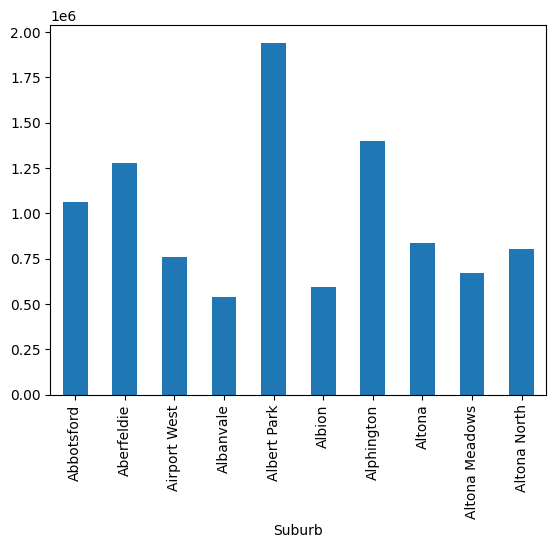

In [226]:
suburb_avg.head(10).plot(kind="bar")
plt.title("Average House Prices in Top 10 Suburbs")
plt.xlabel("Suburb")


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)